In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import spikefinder_eval as se

import scipy.stats as stats

sns.set_style('whitegrid')

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [2]:
data = pd.read_csv('data/results_24_07_17.csv', 
                   usecols=['algo', 'dset', 'measure', 'split', 'value', 
                           'rel value','cell'])


subs = pd.read_csv('data/submissions_22_06_17.csv')


In [3]:
subs['days'] = np.float64(subs['days']) - 24



In [4]:
data.loc[data['dset']==1,'indicator'] = 'ogb'
data.loc[data['dset']==2,'indicator'] = 'ogb'
data.loc[data['dset']==4,'indicator'] = 'ogb'
data.loc[data['dset']==3,'indicator'] = 'gcamp'
data.loc[data['dset']==5,'indicator'] = 'gcamp'

In [5]:
data.head(10)

,algo,cell,dset,measure,rel value,split,value,indicator
0,stm,0,1,corr,NaN,test,0.524731,ogb
1,stm,1,1,corr,NaN,test,0.486117,ogb
2,stm,2,1,corr,NaN,test,0.454547,ogb
3,stm,3,1,corr,NaN,test,0.512064,ogb
4,stm,4,1,corr,NaN,test,0.560148,ogb
5,stm,0,1,corr_bits,NaN,test,0.464629,ogb
6,stm,1,1,corr_bits,NaN,test,0.388941,ogb
7,stm,2,1,corr_bits,NaN,test,0.333904,ogb
8,stm,3,1,corr_bits,NaN,test,0.438718,ogb
9,stm,4,1,corr_bits,NaN,test,0.543227,ogb


In [6]:
subs.head()

,Unnamed: 0,algo,date,days,submitter,test_mean,test_wmean,train_mean,train_wmean,delta_stm
0,0,stm,2016-11-25 02:33:35.196,0.0,test submission,0.387497,0.388992,0.413346,0.420325,0.000000
1,1,oopsi,2016-11-25 02:36:37.119,0.0,test submission,0.258987,0.249635,0.318677,0.326346,-0.128510
2,2,derivative,2016-11-27 09:04:02.070,2.0,test submission,0.103576,0.115694,0.120749,0.123729,-0.283921
3,3,Suite2p,2016-12-04 19:15:26.173,9.0,marius10p,0.423142,0.428679,0.467852,0.471965,0.035645
4,4,Vanilla_0.0a,2017-01-31 04:10:09.410,67.0,Dario Ringach,0.422702,0.428309,0.462818,0.454570,0.035205


## Figure 1



### Submission times

Number of submissions:  39


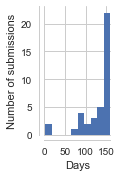

In [7]:
f = plt.figure(figsize=(3/2.54,6/2.54))

subs2 = subs.loc[~(subs['algo'] == 'stm') & ~(subs['algo'] == 'oopsi'),:]

plt.hist(subs2['days'])

plt.xlabel('Days')
plt.ylabel('Number of submissions')

plt.xticks([0, 50, 100, 150])

plt.xlim((0,160))

sns.despine(offset=5)

f.savefig('figures/fig1a_date.pdf',bbox_inches='tight')

print('Number of submissions: ', subs2.shape[0])

In [8]:
# determine order of algorithms   
gdata = data[data['measure']=='corr'].groupby(['algo', 'split'])['value','rel value'].mean().reset_index()
gdata = gdata[gdata['split']=='test'].sort_values(by='value', ascending=0)

order = gdata['algo'].as_matrix()
order

array(['deneux', 'chenkov', 'speiser', 'mineault', 'rupprecht',
       'friedrich', 'pachitariu', 'bolte', 'machado', 'ringach', 'stm',
       'oopsi'], dtype=object)

### Panel 1a: Mean correlation coefficients

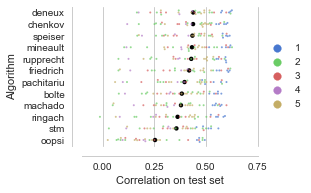

In [9]:


f = plt.figure(figsize=(8/2.54,6.5/2.54))

idx = (data['split']=='test') & (data['measure']=='corr')

ax = sns.swarmplot(data=data[idx], 
                   x='value', y='algo',hue='dset',
                   order=order,palette="muted", alpha=.7, size=2 , orient='h')

sns.pointplot(data=data[idx], 
                   x='value', y='algo', estimator = np.mean, ci=False,
                   order=order,color='k', join=False, markers='.',
                legend_out=False, orient='h', scale=.7)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Correlation on test set')
plt.ylabel('Algorithm')
plt.xlim((-.1, .7))
plt.xticks([0, 0.25, 0.5, .75])

sns.despine(offset=10)

f.savefig('figures/fig1_correlation.pdf',bbox_inches='tight')


### Panel 1b: Correlation improvement

 For the relative correlation improvement, I compute
 
 $$ v_i^{algo} = c_i^{algo}-c_i^{stm}$$

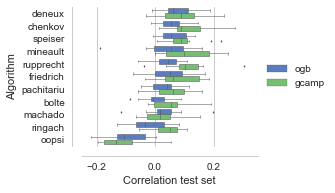

In [10]:
order2 = gdata['algo'].as_matrix()
order2 = order2[order2!='stm'] 

f = plt.figure(figsize=(8/2.54,6.5/2.54))

idx = (data['split']=='test') & (data['measure']=='corr') & (data['algo']!='stm')

ax = sns.boxplot(data=data[idx], 
                   y='algo', x='rel value', hue='indicator',
                    order=order2,palette="muted", orient='h', linewidth=.5, fliersize=2)


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Correlation test set')
plt.ylabel('Algorithm')

plt.xlim((-.25,.35))

sns.despine(offset=10)

f.savefig('figures/fig1_correlation_imp.pdf',bbox_inches='tight')


In [11]:
hdata = data[data['measure']=='corr'].groupby(['algo', 'split'])['value','rel value'].mean().reset_index()
hdata = hdata[hdata['split']=='test'].sort_values(by='value', ascending=0)
hdata['in bits'] = -np.log2(1-hdata['value']**2)

stm = hdata.loc[hdata['algo']=='stm','in bits'].as_matrix()
hdata['rel in bits'] = np.round(100*(hdata['in bits'] - stm)/stm,1)

hdata




,algo,split,value,rel value,in bits,rel in bits
4,deneux,test,0.438228,0.081036,0.307652,56.2
2,chenkov,test,0.437815,0.080623,0.307006,55.9
20,speiser,test,0.434734,0.077541,0.302214,53.5
10,mineault,test,0.432472,0.075280,0.298730,51.7
18,rupprecht,test,0.429115,0.071922,0.293605,49.1
6,friedrich,test,0.418848,0.061656,0.278293,41.3
14,pachitariu,test,0.396692,0.039499,0.247020,25.4
0,bolte,test,0.383376,0.026183,0.229344,16.5
8,machado,test,0.379407,0.022214,0.224232,13.9
16,ringach,test,0.362944,0.005751,0.203781,3.5


### Panel 1c: Repeated measure ANOVA

In [12]:
adata = data[(data['split']=='test')& (data['measure']=='corr')].copy()
adata = adata[['algo', 'cell', 'dset', 'value']]

In [13]:
adata['ucell'] = adata['cell'] + adata['dset'] * 10

In [14]:
%load_ext rpy2.ipython

In [15]:
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri

pandas2ri.activate()

In [16]:
r_data = pandas2ri.py2ri(adata)

In [17]:
afex = importr('afex') 
model = afex.aov_ez('ucell', 'value', r_data, within='algo')
print(model)

Anova Table (Type 3 tests)



Response: value

  Effect           df  MSE         F ges p.value

1   algo 5.18, 150.25 0.00 40.07 *** .13  <.0001



Sphericity correction method: GG 



In [18]:
lsm  = importr('lsmeans')
pairwise = lsm.lsmeans(model, "algo", contr="pairwise", adjust="holm")
print(pairwise)

$lsmeans

 algo          lsmean         SE    df  lower.CL  upper.CL

 bolte      0.3845029 0.02543686 36.46 0.3329371 0.4360688

 chenkov    0.4389425 0.02543686 36.46 0.3873767 0.4905083

 deneux     0.4393554 0.02543686 36.46 0.3877896 0.4909213

 friedrich  0.4199755 0.02543686 36.46 0.3684097 0.4715413

 machado    0.3805340 0.02543686 36.46 0.3289682 0.4320998

 mineault   0.4335995 0.02543686 36.46 0.3820336 0.4851653

 oopsi      0.2502015 0.02551516 36.90 0.1984984 0.3019046

 pachitariu 0.3978192 0.02543686 36.46 0.3462534 0.4493850

 ringach    0.3640708 0.02543686 36.46 0.3125050 0.4156366

 rupprecht  0.4302416 0.02543686 36.46 0.3786758 0.4818074

 speiser    0.4358607 0.02543686 36.46 0.3842948 0.4874265

 stm        0.3583198 0.02543686 36.46 0.3067540 0.4098856



Confidence level used: 0.95 



$contrasts

 contrast                    estimate         SE  df t.ratio p.value

 bolte - chenkov        -0.0544395586 0.01147410 339  -4.745  0.0001

 bolte - deneux         

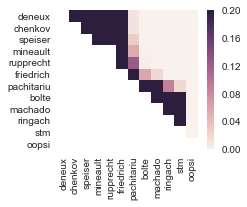

In [19]:
# I am sure there is a better way to do this and directly get the data back, 
# but I just manually entered them into the excel sheet loaded below

pvalues = pd.read_excel('figures/pairwise_comp.xls')


f = plt.figure(figsize=(8/2.54,6.5/2.54))

sns.heatmap(pvalues, vmin=0, vmax=.2)

#sns.despine(offset=10)

f.savefig('figures/pairwise.pdf',bbox_inches='tight')


### Panel 1d: Overfitting

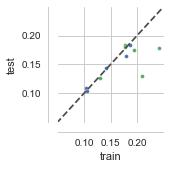

In [20]:
hdata = data[data['measure']=='corr'].groupby(['algo', 'split'])['value','rel value'].mean().reset_index()

sup = [True, True, False, False, True, True, False, False, False, True, True, False]
train = hdata[hdata.split=='train']['value'].as_matrix()
test = hdata[hdata.split=='test']['value'].as_matrix()

df = pd.DataFrame({'train': train-np.min(train), 'test': test-np.min(test), 'sup': sup})
#df = pd.DataFrame({'train': train-train[-1], 'test': test-, 'sup': sup})

#f = plt.figure(figsize=(12/2.54,6.5/2.54))

g = sns.pairplot(data=df, x_vars='train', y_vars='test', hue='sup', size=6/2.54, aspect=1,plot_kws={"s": 15})
#plt.scatter(train-np.min(train), test-np.min(test), c=np.double(sup), s=10)
plt.xlim([0.05,.25])
plt.ylim([0.05,.25])
plt.xticks([0.1,.15,.2])
plt.yticks([0.1,.15,.2])

g._legend.remove()

sns.despine(offset=10)
plt.plot([0,0.5],[0, 0.5], ls="--", c=".3")

g.savefig('figures/fig1_overfit.pdf',bbox_inches='tight')



## Figure 2: Example responses


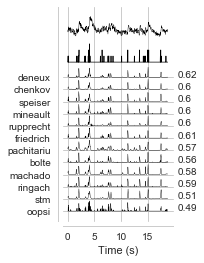

In [22]:
# here will be some spike trains

algos =  ['stm','chenkov', 'deneux', 'friedrich', 'machado', 'mineault', 
               'pachitariu', 'ringach', 'rupprecht', 'bolte', 'speiser', 'oopsi']

f = plt.figure(figsize=(5/2.54,10/2.54))

# for paper 2 examples
dset = '3.test'
neuron = '2'
tw = np.arange(2000,5000)

dset = '1.test'
neuron = '3'
tw = np.arange(14000,17000)

t = np.round((tw[-1]-tw[0])/4)
t =np.arange(0,t*25,25)/1000

file = 'T:/data/spikefinder/truth/{}.spikes.csv'.format(dset)
spikes = se._downsample(se.load(file).loc[tw,neuron].as_matrix(),4)

file = 'T:/data/spikefinder/truth/{}.calcium.csv'.format(dset)
calcium = se._downsample(se.load(file).loc[tw,neuron].as_matrix(),4)

calcium = (calcium-np.min(calcium,axis=0))/(np.max(calcium,axis=0)-np.min(calcium,axis=0))

sp = sns.color_palette()

ax = plt.plot(t,.6*spikes-2.5,color='k', linewidth=.7)  
plt.plot(t,2*calcium,color='k', linewidth=.4) 

ticks = np.zeros_like(order)
lab = []

for a, algo in enumerate(order): 
    file = 'T:/data/spikefinder/{}/{}.spikes.csv'.format(algo, dset)
    pred = se.load(file)
            
    pred = se._downsample(pred.loc[tw,neuron].as_matrix(),4)
    
    id = (data['measure']==
      'corr') & (data['dset']==
                 np.int32(dset[0])) & (data['cell']==
                                       np.int32(neuron)) & (data['split']==
                                       'test') & (data['algo']==
                                       algo) 
    
    c = np.round(data.loc[id,'value'].as_matrix(),2)
    
    pred = (pred-np.min(pred,axis=0))/(np.max(pred,axis=0)-np.min(pred,axis=0))
    
    plt.plot(t,pred-1.2*a-4,color='k', linewidth=.4)
    
    ticks[a] = -1.2*a-4
    
    plt.text(1.05*plt.xlim()[1],-1.2*a-4, '{}'.format(c[0]))
    
    
plt.yticks(ticks,order)
plt.xticks([0, 5, 10, 15])
plt.xlabel('Time (s)')

sns.despine(offset=5)

f.savefig('figures/fig1_ogb_example.pdf',bbox_inches='tight', dpi=300)



### Panel c: Correlation matrix


We compute the correlation matrix between predictions made by the different algorithms

In [23]:
dsets = ['1.test', '2.test', '3.test', '4.test', '5.test']

algos =  ['stm','chenkov', 'deneux', 'friedrich', 'machado', 'mineault', 
               'pachitariu', 'ringach', 'rupprecht', 'bolte', 'speiser', 'oopsi']


c = np.zeros((len(algos), len(algos),33))




for a, algo in enumerate(order): 
    print(algo)
    for b, blgo in enumerate(order):
        cc = 0
        
        if b>a:
        
            for d, dset in enumerate(dsets):
                file = 'T:/data/spikefinder/{}/{}.spikes.csv'.format(algo, dset)
                pred1 = se.load(file)

                if algo=='machado':
                    pred1 = pred1.iloc[:,1::]

                file = 'T:/data/spikefinder/{}/{}.spikes.csv'.format(blgo, dset)
                pred2 = se.load(file)

                if blgo=='machado':
                    pred2 = pred2.iloc[:,1::]

                for col in pred1:
                    x = pred1[col]
                    y = pred2[col]

                    naninds = np.isnan(x) | np.isnan(y)
                    x = x[~naninds]
                    y = y[~naninds]

                    x = se._downsample(x,4)
                    y = se._downsample(y,4)

                    ml = min([len(x),len(y)])

                    x = x[0:ml]
                    y = y[0:ml]

                    c[a,b, cc] = np.corrcoef(x,y)[0,1]
                    cc +=1 
            else:
                    c[d,a,b] = np.NaN

   
    
    



deneux


C:\Users\pberens\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\pberens\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


chenkov
speiser
mineault
rupprecht
friedrich
pachitariu
bolte
machado
ringach
stm
oopsi


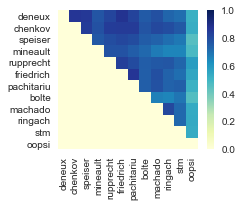

In [84]:
f = plt.figure(figsize=(8/2.54,6.5/2.54))

ax = sns.heatmap(np.nanmean(c, axis=2), vmin=0, vmax=1, xticklabels=order, yticklabels=order,cmap="YlGnBu")

f.savefig('figures/fig1_algo_corr.pdf',bbox_inches='tight', dpi=300)

Compute the average correlation among the outputs of the top group

In [33]:
C = np.nanmean(c,axis=2)[0:6,0:6]
C[C==0] = np.NaN
print(np.nanmean(C.flatten()))
print(np.nanstd(C.flatten()))


0.822830121698
0.0365440274588


## Ensemble method

We test whether we can get higher correlation by averaging the predictions of the first 6 methods by using their average.

In [80]:
dsets = ['1.test', '2.test', '3.test', '4.test', '5.test']

algos =  ['chenkov', 'deneux', 'friedrich', 'mineault', 
               'rupprecht', 'speiser']

ce = np.zeros((33,1))

n = 0

for d, dset in enumerate(dsets):
    print(dset)
    
    file = 'T:/data/spikefinder/truth/{}.spikes.csv'.format(dset)
    spikes = se.load(file)
    
    for col in spikes: 
        y = spikes[col]
        ndx = np.isnan(y)
        y = se._downsample(y[~ndx],4)
        y = y[0:len(y)-5]

        X = np.zeros((len(y),len(algos)))
        
        
        for a, algo in enumerate(algos): 

            file = 'T:/data/spikefinder/{}/{}.spikes.csv'.format(algo, dset)
            pred1 = se.load(file)

            if algo=='machado':
                pred1 = pred1.iloc[:,1::]

            x = pred1[col]
            x = se._downsample(x[~ndx],4)

            X[:,a] = x[0:len(y)]

        X = (X-np.mean(X,axis=0))/np.std(X,axis=0)
        ex = np.nanmean(X,axis=1)
        
        ce[n] = np.corrcoef(ex,y)[0,1]
        n += 1
            



1.test
2.test
3.test
4.test
5.test


In [87]:
print(np.mean(ce))
print(np.std(ce))

0.443567550884
0.14980001966
